<a href="https://colab.research.google.com/github/javajerry/Algorithm-Trading/blob/main/LTSM_Tesla_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description: This program uses an artifical recurrent neural network called Long Short Term Memory(LSTM) 
#              to predict the closing stock proce of a corporation(applie Inc.) using the past 60 days stock price.


In [2]:
#import the library
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock quoote
df = web.DataReader('TSLA', data_source='yahoo', start='2013-01-01', end='2020-12-24')
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,7.090000,6.942000,7.000000,7.072000,5974000.0,7.072000
2013-01-03,7.090000,6.950000,7.036000,6.954000,3710000.0,6.954000
2013-01-04,6.960000,6.784000,6.960000,6.880000,3370000.0,6.880000
2013-01-07,6.960000,6.780000,6.960000,6.868000,2210000.0,6.868000
2013-01-08,6.900000,6.622000,6.900000,6.736000,6420000.0,6.736000
...,...,...,...,...,...,...
2020-12-18,695.000000,628.539978,668.900024,695.000000,222126200.0,695.000000
2020-12-21,668.500000,646.070007,666.239990,649.859985,58045300.0,649.859985
2020-12-22,649.880005,614.229980,648.000000,640.340027,51716000.0,640.340027


In [4]:
# Get the number of rows and columns in the data set
df.shape

(2011, 6)

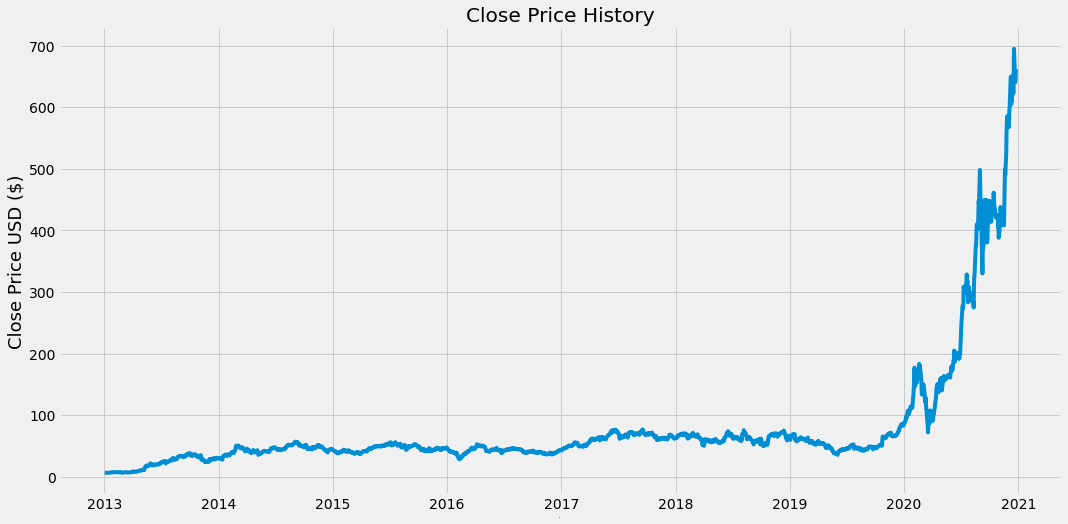

In [5]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=1)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [6]:
#Create a new daataframe with only the 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1609

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[7.11777216e-04],
       [5.40369684e-04],
       [4.32877025e-04],
       ...,
       [9.20600604e-01],
       [9.28793234e-01],
       [9.51729937e-01]])

In [8]:
#Create the trainng data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.00071178, 0.00054037, 0.00043288, 0.00041545, 0.0002237 ,
       0.00021208, 0.00018012, 0.        , 0.00010168, 0.00028762,
       0.00034572, 0.00042707, 0.00046774, 0.00066239, 0.00089771,
       0.00118533, 0.00118242, 0.00148747, 0.00146423, 0.0013393 ,
       0.0013364 , 0.00156591, 0.00140322, 0.00151652, 0.00181866,
       0.00190872, 0.001839  , 0.00160077, 0.0014468 , 0.00160949,
       0.00155719, 0.00119985, 0.00185062, 0.00163563, 0.00065367,
       0.00092967, 0.00042707, 0.00044159, 0.00063624, 0.0005578 ,
       0.00050551, 0.00077569, 0.00108655, 0.00138869, 0.00154557,
       0.0016153 , 0.00179833, 0.00180414, 0.00176346, 0.00114465,
       0.00069144, 0.00065077, 0.00063043, 0.00088318, 0.00090062,
       0.00107783, 0.00134221, 0.00143808, 0.00152524, 0.0014468 ])]
[0.0032015439345195965]



In [9]:
#Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data
print('before', x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('after', x_train.shape)


before (1549, 60)
after (1549, 60, 1)


In [11]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1549/1549 [==============================] - 36s 21ms/step - loss: 1.4530e-04


In [14]:
#Create the testing data set
#Create a new array containing scaled values from index 1549 to 2009
test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

  if i<=60:
    print(x_test)
    print()


[array([0.08337086, 0.07608168, 0.07334207, 0.07077967, 0.07069252,
       0.0707942 , 0.07298763, 0.07495736, 0.07276103, 0.07438794,
       0.07467847, 0.07045719, 0.0687315 , 0.06814464, 0.06992554,
       0.07004756, 0.06729051, 0.06609647, 0.0682318 , 0.07028288,
       0.07138395, 0.0717442 , 0.07445186, 0.07349314, 0.07521593,
       0.06823471, 0.07032065, 0.06980933, 0.06955077, 0.07064022,
       0.06842064, 0.06821147, 0.06782798, 0.06985582, 0.069237  ,
       0.06982676, 0.06677338, 0.06710748, 0.06558515, 0.06238071,
       0.0587521 , 0.06059109, 0.05978344, 0.0584238 , 0.06135516,
       0.06453056, 0.06462062, 0.06221511, 0.06157015, 0.06073926,
       0.06002458, 0.05639016, 0.05792992, 0.05782533, 0.05677365,
       0.05174763, 0.05010037, 0.05001903, 0.0464311 , 0.04723293])]



In [15]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [16]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
#Get the models predicted values
predictions = model.predict(x_test)
#scale back
predictions = scaler.inverse_transform(predictions)

In [18]:
# Get Root Mean Square Error (RMSE)
# RMSE is a good measure of how accurate the model predicts the response and
# it's the standard deviation of the residuals and the lower values usually 
# indicates the better fit. Usually you want to evaluate your model with other 
# metrics

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

14.567802391242033

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


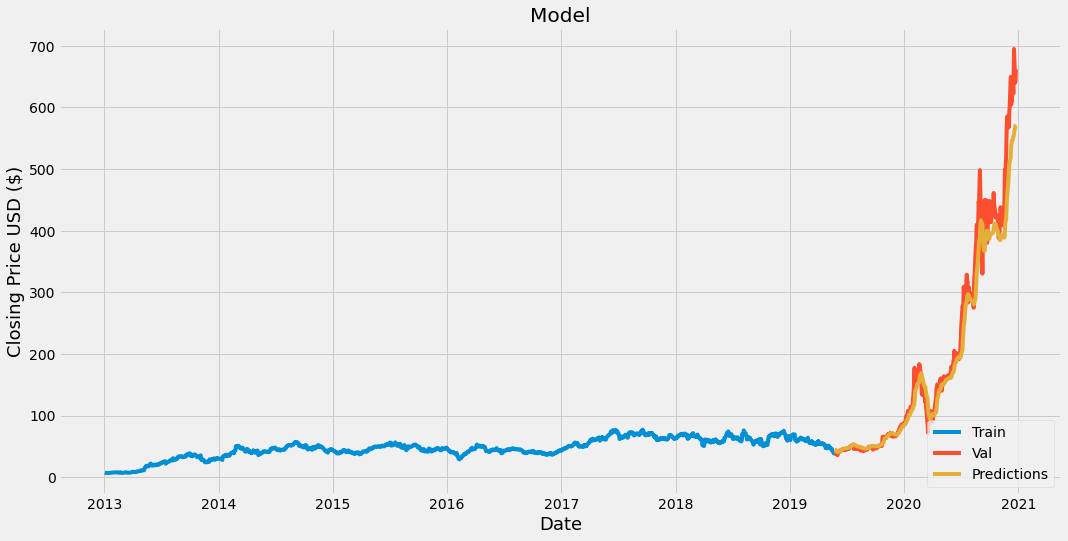

In [19]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

#Note
# blue values on which model was trained
# red is the actual values (closing price) for the rest of these days
# yellow is the values predicted by the model

In [20]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-05-24,38.125999,45.046364
2019-05-28,37.740002,44.093288
2019-05-29,37.972000,43.231186
2019-05-30,37.644001,42.532059
2019-05-31,37.032001,41.955608
...,...,...
2020-12-18,695.000000,557.814880
2020-12-21,649.859985,565.840942
2020-12-22,640.340027,569.920410


In [21]:
# Try to predict the value
# Get the quote
apple_quote = web.DataReader('TSLA', data_source='yahoo', start='2013-01-01', end='2020-12-23')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data betwen 0 an 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape the data to be 3D shape
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[571.7023]]


In [22]:
#Get the Quote
apple_quote2 = web.DataReader('TSLA', data_source='yahoo', start='2020-12-24', end='2020-12-24')
print(apple_quote2['Close'])

Date
2020-12-24    661.77002
2020-12-24    661.77002
Name: Close, dtype: float64
